Affinely parametrized linear BVP:

     - div( mu * grad(u) ) + w * grad(u) = f  in domain
                                       u = g  on bdry dirichlet
                         - mu nabla(u).n = 0 on bdry Neumann
with w: given velocity field

Single input parameter: mu (the diffusivity coeff.)
    
Goal: Solve this BVP by an offline-online strategy based on a POD.

In [1]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eigh
import time
import random
import numpy.linalg as npl
import scipy
import scipy.linalg   
import math
from mpl_toolkits.mplot3d import axes3d

In [2]:
# The PDE parameter: diffusivity lambda(mu)
def Lambda(mu):
#    return  mu + mu0 # affine case
    return np.exp(mu0*(mu+1.)) # non-affine case

In [3]:
# Function to compute the RB dimension (= Nrb)
def energy_number(epsilon_POD,lam):
    # lam: eigenvalues table
    # return the eignvalue number corresponding to energy_ratio
    index_min = 0; s = 0.;s1=np.sum(lam)
    for i in range(len(lam)):
        if s < s1*(1-epsilon_POD):
            s += lam[i]
            index_min = index_min + 1
    return index_min

In [4]:
# Dirichlet boundary conditions
tol_bc = 1E-10
def u_bdry_0(x, on_boundary):
    return bool(on_boundary and (near(x[0], 0, tol_bc)))
def u_bdry_1(x, on_boundary):
    return bool(on_boundary and (near(x[0], 1, tol_bc)))

#    Offline phase

In [5]:
# Physical and numerical parameters
# Mesh and function spaces
NP =  35; print('Number of mesh points NP = ', NP)
mesh = UnitSquareMesh(NP,NP)
k = 1 ; print('Order of the Lagrange FE k = ', k)
V = FunctionSpace(mesh, "CG", int(k))
V_vec = VectorFunctionSpace(mesh, "CG", int(k))
NN = V.dim(); print('Resulting number of nodes NN = ', NN)
coordinates = mesh.coordinates()
# Trial and test function
u, v = TrialFunction(V), TestFunction(V)

Number of mesh points NP =  35
Order of the Lagrange FE k =  1
Resulting number of nodes NN =  1296


In [9]:
# Snapshots number
print('How many snapshots do I compute ? ')
M = int(input())

# The parameter range mu
# The input parameter mu_0
mu0 = 0.7
# The input parameter mu
mu_min = 1.0; mu_max = 10. # range of values 
print('Range values for mu: [',mu_min,',',mu_max,']')
mu = np.linspace(mu_min,mu_max,M)

How many snapshots do I compute ? 
Range values for mu: [ 1.0 , 10.0 ]


Param= [   4.05519997    8.16616991   16.44464677   33.11545196   66.68633104
  134.28977968  270.42640743  544.57191013 1096.63315843 2208.34799189]


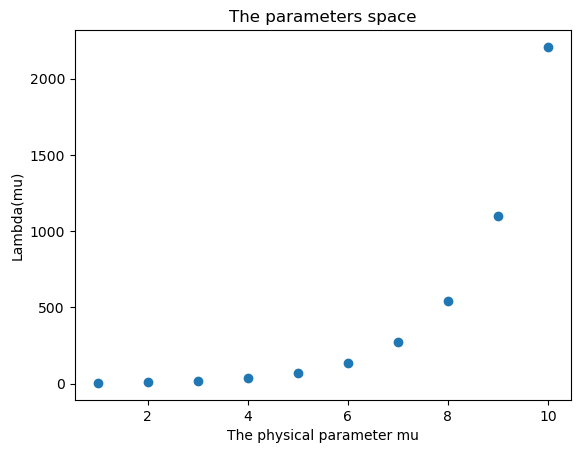

In [10]:
# Plot of the parameter space
Param =  np.zeros(len(mu))
for i in range(len(mu)):
    Param[i] = Lambda(mu[i])
print("Param=",Param)
fig = plt.figure()
ax = fig.gca() 
ax.scatter(mu, Param) 
plt.title("The parameters space")
ax.set_xlabel('The physical parameter mu')
ax.set_ylabel('Lambda(mu)')
# plt.legend()
plt.show()